In [50]:
#pip install seaborn

You should consider upgrading via the 'c:\miniconda\python.exe -m pip install --upgrade pip' command.


In [268]:
#pip install sklearn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\miniconda\python.exe -m pip install --upgrade pip' command.


  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1320 sha256=c0b2fd205c0743acc364c272a39a3afe6e7e18537e73bc801a06f0bce0d2bb10
  Stored in directory: c:\users\dell pc\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


In [394]:
#pip install pydot

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\miniconda\python.exe -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import xlrd
import matplotlib.pyplot as plt

In [2]:
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from numpy import argmax
from numpy import argmin

In [3]:
import seaborn
import random
import pydot

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.tree import export_graphviz

In [5]:
%matplotlib inline

In [6]:
df_ODraw = pd.read_excel('E:\OD Prediction Model\Python Implementation\InputDataClosedPIDs.xlsx')

In [3]:
df_ODraw.columns

Index(['ProjectClass', 'ProjectPLTheaterFunction', 'ProjectPLLevel7',
       'ProjectCurrency', 'ASApprovedBudgetedHours', 'ASApprovedCostBudget',
       'ASApprovedRevenueBudget', 'ASApprovedBudgetProjectMargin$', 'ODFlag',
       'Arch', 'Offer', 'ASApprovedBudgetProjectMargin%',
       'ProjectScheduledStartDate', 'ProjectScheduledFinishDate',
       'ProjectScheduledDuration', 'ProjectCreationDate',
       'ProjectActivationDate', 'ProjectActiveAfterCreat', 'ActualTotalCosts',
       'ASApprovedT&ECost', 'ASApprovedPartnerCost', 'Discount%'],
      dtype='object')

In [7]:
df_ODraw.head()

,ProjectClass,ProjectPLTheaterFunction,ProjectPLLevel7,ProjectCurrency,ASApprovedBudgetedHours,ASApprovedCostBudget,ASApprovedRevenueBudget,ASApprovedBudgetProjectMargin$,ODFlag,Arch,...,ProjectScheduledStartDate,ProjectScheduledFinishDate,ProjectScheduledDuration,ProjectCreationDate,ProjectActivationDate,ProjectActiveAfterCreat,ActualTotalCosts,ASApprovedT&ECost,ASApprovedPartnerCost,Discount%
0,Transaction,APJ&GC,APJ&GCAPJ&GC,AUD,128,18921,46680,27759,0,ALL,...,2008-12-17,2009-12-17,365,2008-12-17,2010-11-16,699,3623,0,0,0.161186
1,Transaction,AMER,AMERNOPS,USD,4672,656330,1204673,548343,0,ALL,...,2009-01-16,2014-05-10,1940,2009-01-16,2011-05-05,839,237969,54250,0,0.174039
2,Transaction,EMEAR,EMEAREMEAR,USD,1824,279120,449272,170152,0,ALL,...,2009-01-19,2013-12-15,1791,2009-01-19,2010-08-25,583,222827,0,0,0.275679
3,Transaction,GSP,GSPEMEAR,USD,736,116640,194399,77759,0,ALL,...,2009-02-18,2010-02-18,365,2009-02-18,2010-08-03,531,61941,0,0,0.250004
4,Transaction,AMER,AMERNOPS,CAD,476,77311,151697,74386,0,ALL,...,2010-12-04,2011-12-04,365,2009-02-25,2010-12-15,658,73030,0,0,0.332864


In [8]:
df_ODraw = df_ODraw.drop(['ProjectPLTheaterFunction'],axis=1)

In [9]:
df_ODraw = df_ODraw.drop(['ProjectScheduledStartDate'],axis=1)
df_ODraw = df_ODraw.drop(['ProjectScheduledFinishDate'],axis=1)

In [10]:
df_ODraw = df_ODraw.drop(['ProjectCreationDate'],axis=1)

In [11]:
df_ODraw['ProjectCurrencyGroup'] = ""
for i in range(len(df_ODraw)):
    if (df_ODraw['ProjectCurrency'][i] == "AUD") or (df_ODraw['ProjectCurrency'][i] == "CAD"):
        df_ODraw['ProjectCurrencyGroup'][i] = "AUDCAD"
    elif (df_ODraw['ProjectCurrency'][i] == "BRL"):
        df_ODraw['ProjectCurrencyGroup'][i] = "BRL"
    else:
        df_ODraw['ProjectCurrencyGroup'][i] = "OTHERCURRENCY"

<ipython-input-11-ed186ed7c0ac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ODraw['ProjectCurrencyGroup'][i] = "AUDCAD"
<ipython-input-11-ed186ed7c0ac>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ODraw['ProjectCurrencyGroup'][i] = "OTHERCURRENCY"
<ipython-input-11-ed186ed7c0ac>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ODraw['ProjectCurrencyGroup'][i] = "BRL"


In [12]:
df_ODraw['ProjectCurrencyGroup'].head()

0           AUDCAD
1    OTHERCURRENCY
2    OTHERCURRENCY
3    OTHERCURRENCY
4           AUDCAD
Name: ProjectCurrencyGroup, dtype: object

In [13]:
df_ODraw['ActivationYear'] = pd.DatetimeIndex(df_ODraw['ProjectActivationDate']).year

In [14]:
df_ODraw['ActivationYear'].head()

0    2010
1    2011
2    2010
3    2010
4    2010
Name: ActivationYear, dtype: int64

In [15]:
df_ODraw = df_ODraw.drop(['ProjectActivationDate'],axis=1)

In [16]:
df_ODraw['ODpercent'] = df_ODraw['ActualTotalCosts']/df_ODraw['ASApprovedCostBudget']*100

In [17]:
df_ODraw['ODpercent'].head()

0    19.148037
1    36.257523
2    79.831972
3    53.104424
4    94.462625
Name: ODpercent, dtype: float64

In [19]:
df_ODraw.dtypes

ProjectClass                       object
ProjectPLLevel7                    object
ProjectCurrency                    object
ASApprovedBudgetedHours             int64
ASApprovedCostBudget                int64
ASApprovedRevenueBudget             int64
ASApprovedBudgetProjectMargin$      int64
ODFlag                              int64
Arch                               object
Offer                              object
ASApprovedBudgetProjectMargin%    float64
ProjectScheduledDuration            int64
ProjectActiveAfterCreat             int64
ActualTotalCosts                    int64
ASApprovedT&ECost                   int64
ASApprovedPartnerCost               int64
Discount%                         float64
ProjectCurrencyGroup               object
ActivationYear                      int64
ODpercent                         float64
dtype: object

In [18]:
df_ODraw = df_ODraw.drop(['ActualTotalCosts'],axis=1)

In [ ]:
# 5 Drop all outlier rows where 'ASApprovedBudgetedHours' > 53334

In [19]:
df_ODraw = df_ODraw.drop(df_ODraw[df_ODraw['ASApprovedBudgetedHours']==df_ODraw['ASApprovedBudgetedHours'].max()].index)

In [20]:
df_ODraw['ASApprovedBudgetedHours'].max()

116221

In [21]:
# 1 Drop all outlier rows where 'ASApprovedCostBudget' > 29044298

In [22]:
df_ODraw = df_ODraw.drop(df_ODraw[df_ODraw['ASApprovedCostBudget']==df_ODraw['ASApprovedCostBudget'].max()].index)

In [36]:
df_ODraw['ASApprovedCostBudget'].max()

29044298

In [ ]:
# 2 Drop all outlier rows where 'ASApprovedRevenueBudget' > 28889356

In [23]:
df_ODraw = df_ODraw.drop(df_ODraw[df_ODraw['ASApprovedRevenueBudget']==df_ODraw['ASApprovedRevenueBudget'].max()].index)

In [43]:
df_ODraw['ASApprovedRevenueBudget'].max()

28889356

In [ ]:
# 4 Drop all outlier rows where 'ASApprovedBudgetProjectMargin$' < -4982863

In [24]:
df_ODraw = df_ODraw.drop(df_ODraw[df_ODraw['ASApprovedBudgetProjectMargin$']==df_ODraw['ASApprovedBudgetProjectMargin$'].min()].index)

In [54]:
df_ODraw['ASApprovedBudgetProjectMargin$'].min()

-4982863

In [ ]:
# 6 Drop all outlier rows where 'ASApprovedBudgetProjectMargin%' < -60.75

In [25]:
df_ODraw = df_ODraw.drop(df_ODraw[df_ODraw['ASApprovedBudgetProjectMargin%']==df_ODraw['ASApprovedBudgetProjectMargin%'].min()].index)

In [71]:
df_ODraw['ASApprovedBudgetProjectMargin%'].min()

-60.75

In [ ]:
# 2 Drop all outlier rows where 'ProjectScheduledDuration' > 3024

In [26]:
df_ODraw = df_ODraw.drop(df_ODraw[df_ODraw['ProjectScheduledDuration']==df_ODraw['ProjectScheduledDuration'].max()].index)

In [76]:
df_ODraw['ProjectScheduledDuration'].max()

3024

In [ ]:
# 6 Drop all outlier rows where 'ASApprovedT&ECost' > 1255462

In [80]:
df_ODraw = df_ODraw.drop(df_ODraw[df_ODraw['ASApprovedT&ECost']==df_ODraw['ASApprovedT&ECost'].max()].index)

In [81]:
df_ODraw['ASApprovedT&ECost'].max()

1255462

In [ ]:
# 8 Drop all outlier rows where 'ASApprovedPartnerCost' > 4098736

In [41]:
df_ODraw = df_ODraw.drop(df_ODraw[df_ODraw['ASApprovedPartnerCost']==df_ODraw['ASApprovedPartnerCost'].max()].index)

In [63]:
df_ODraw['ASApprovedPartnerCost'].max()

4098736

In [52]:
# 7 Drop all outlier rows where 'Discount%' < -14.74

In [53]:
df_ODraw = df_ODraw.drop(df_ODraw[df_ODraw['Discount%']==df_ODraw['Discount%'].min()].index)

In [54]:
df_ODraw['Discount%'].min()

-14.731631205673757

In [61]:
# 4 Drop all outlier rows where 'ODpercent' > 2993.26

In [59]:
df_ODraw = df_ODraw.drop(df_ODraw[df_ODraw['ODpercent']==df_ODraw['ODpercent'].max()].index)

In [60]:
df_ODraw['ODpercent'].max()

2993.2624113475176

<AxesSubplot:xlabel='ASApprovedT&ECost', ylabel='ASApprovedPartnerCost'>

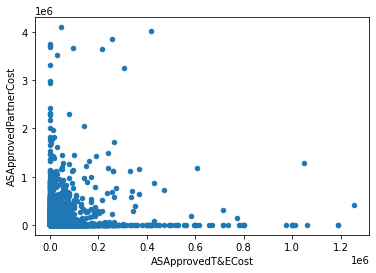

In [82]:
df_ODraw.plot(kind="scatter",x='ASApprovedT&ECost',y='ASApprovedPartnerCost')

<AxesSubplot:xlabel='ODpercent'>

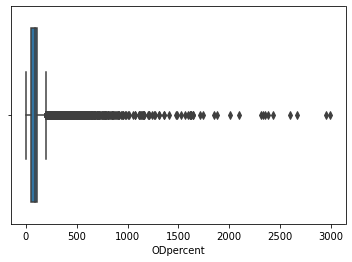

In [197]:
seaborn.boxplot(x=df_ODraw['ODpercent'])

<AxesSubplot:ylabel='Frequency'>

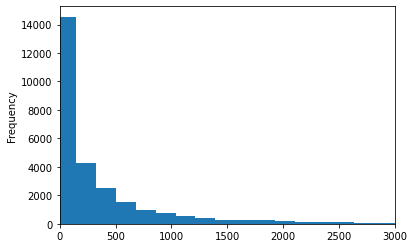

In [166]:
df_ODraw['ASApprovedBudgetedHours'].plot.hist(bins=300,xlim=(0,3000))

In [83]:
df_ODraw.reset_index(drop=True)

,ProjectClass,ProjectPLLevel7,ProjectCurrency,ASApprovedBudgetedHours,ASApprovedCostBudget,ASApprovedRevenueBudget,ASApprovedBudgetProjectMargin$,ODFlag,Arch,Offer,ASApprovedBudgetProjectMargin%,ProjectScheduledDuration,ProjectActiveAfterCreat,ASApprovedT&ECost,ASApprovedPartnerCost,Discount%,ProjectCurrencyGroup,ActivationYear,ODpercent
0,Transaction,APJ&GCAPJ&GC,AUD,128,18921,46680,27759,0,ALL,OTHER,0.59,365,699,0,0,0.161186,AUDCAD,2010,19.148037
1,Transaction,AMERNOPS,USD,4672,656330,1204673,548343,0,ALL,OTHER,0.46,1940,839,54250,0,0.174039,OTHERCURRENCY,2011,36.257523
2,Transaction,EMEAREMEAR,USD,1824,279120,449272,170152,0,ALL,OTHER,0.38,1791,583,0,0,0.275679,OTHERCURRENCY,2010,79.831972
3,Transaction,GSPEMEAR,USD,736,116640,194399,77759,0,ALL,OTHER,0.40,365,531,0,0,0.250004,OTHERCURRENCY,2010,53.104424
4,Transaction,AMERNOPS,CAD,476,77311,151697,74386,0,ALL,OTHER,0.49,365,658,0,0,0.332864,AUDCAD,2010,94.462625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28060,Subscription,GSPAPJ,AUD,55,8276,12184,3907,0,CORENETWORKING,OPTIMIZATION,0.32,41,8,0,0,0.587782,AUDCAD,2017,44.647173
28061,Subscription,AMERNOPS,USD,48,9840,20000,10160,0,COLLABORATION,SWINTG,0.51,104,74,0,0,0.430894,OTHERCURRENCY,2017,90.528455
28062,Subscription,GSPAMER,USD,13,2665,5922,3257,0,COLLABORATION,SWINTG,0.55,59,3,0,0,0.377801,OTHERCURRENCY,2017,82.401501
28063,Subscription,AMERUSPS,USD,589,103597,231360,127763,1,CORENETWORKING,OPTIMIZATION,0.55,104,93,0,0,0.374685,OTHERCURRENCY,2017,116.118227


In [145]:
df_ODraw.head()

,ProjectClass,ProjectPLLevel7,ProjectCurrency,ASApprovedBudgetedHours,ASApprovedCostBudget,ASApprovedRevenueBudget,ASApprovedBudgetProjectMargin$,ODFlag,Arch,Offer,ASApprovedBudgetProjectMargin%,ProjectScheduledDuration,ProjectActiveAfterCreat,ASApprovedT&ECost,ASApprovedPartnerCost,Discount%,ProjectCurrencyGroup,ActivationYear,ODpercent
0,Transaction,APJ&GCAPJ&GC,AUD,128,18921,46680,27759,0,ALL,OTHER,0.59,365,699,0,0,0.161186,AUDCAD,2010,19.148037
1,Transaction,AMERNOPS,USD,4672,656330,1204673,548343,0,ALL,OTHER,0.46,1940,839,54250,0,0.174039,OTHERCURRENCY,2011,36.257523
2,Transaction,EMEAREMEAR,USD,1824,279120,449272,170152,0,ALL,OTHER,0.38,1791,583,0,0,0.275679,OTHERCURRENCY,2010,79.831972
3,Transaction,GSPEMEAR,USD,736,116640,194399,77759,0,ALL,OTHER,0.40,365,531,0,0,0.250004,OTHERCURRENCY,2010,53.104424
4,Transaction,AMERNOPS,CAD,476,77311,151697,74386,0,ALL,OTHER,0.49,365,658,0,0,0.332864,AUDCAD,2010,94.462625


In [84]:
ODraw = df_ODraw

In [85]:
del df_ODraw

In [86]:
ODprcraw = ODraw

In [87]:
ODprcraw = ODprcraw.drop(['ProjectCurrency'],axis=1)

In [88]:
ODraw = ODraw.drop(['ProjectCurrency'],axis=1)

In [89]:
ODraw = ODraw.drop(['ODpercent'],axis=1)

In [ ]:
# Convert ActivationYear to dtype:String

In [90]:
ODraw['ActivationYear'] = ODraw['ActivationYear'].astype(int).astype(str)

In [91]:
ODraw['ASApprovedBudgetedHours'] = (ODraw['ASApprovedBudgetedHours']-ODraw['ASApprovedBudgetedHours'].mean())/ODraw['ASApprovedBudgetedHours'].std()

In [92]:
ODraw['ASApprovedCostBudget'] = (ODraw['ASApprovedCostBudget']-ODraw['ASApprovedCostBudget'].mean())/ODraw['ASApprovedCostBudget'].std()

In [93]:
ODraw['ASApprovedRevenueBudget'] = (ODraw['ASApprovedRevenueBudget']-ODraw['ASApprovedRevenueBudget'].mean())/ODraw['ASApprovedRevenueBudget'].std()

In [94]:
ODraw['ASApprovedBudgetProjectMargin$'] = (ODraw['ASApprovedBudgetProjectMargin$']-ODraw['ASApprovedBudgetProjectMargin$'].mean())/ODraw['ASApprovedBudgetProjectMargin$'].std()

In [95]:
ODraw['ASApprovedBudgetProjectMargin%'] = (ODraw['ASApprovedBudgetProjectMargin%']-ODraw['ASApprovedBudgetProjectMargin%'].mean())/ODraw['ASApprovedBudgetProjectMargin%'].std()

In [96]:
ODraw['ProjectScheduledDuration'] = (ODraw['ProjectScheduledDuration']-ODraw['ProjectScheduledDuration'].mean())/ODraw['ProjectScheduledDuration'].std()

In [97]:
ODraw['ProjectActiveAfterCreat'] = (ODraw['ProjectActiveAfterCreat']-ODraw['ProjectActiveAfterCreat'].mean())/ODraw['ProjectActiveAfterCreat'].std()

In [98]:
ODraw['ASApprovedT&ECost'] = (ODraw['ASApprovedT&ECost']-ODraw['ASApprovedT&ECost'].mean())/ODraw['ASApprovedT&ECost'].std()

In [99]:
ODraw['ASApprovedPartnerCost'] = (ODraw['ASApprovedPartnerCost']-ODraw['ASApprovedPartnerCost'].mean())/ODraw['ASApprovedPartnerCost'].std()

In [100]:
ODraw['Discount%'] = (ODraw['Discount%']-ODraw['Discount%'].mean())/ODraw['Discount%'].std()

In [101]:
ODraw['Discount%'].mean()

-1.6304632881863692e-16

In [102]:
ODrawnn = pd.get_dummies(ODraw,prefix_sep='_')

In [103]:
ODrawnn.head()

,ASApprovedBudgetedHours,ASApprovedCostBudget,ASApprovedRevenueBudget,ASApprovedBudgetProjectMargin$,ODFlag,ASApprovedBudgetProjectMargin%,ProjectScheduledDuration,ProjectActiveAfterCreat,ASApprovedT&ECost,ASApprovedPartnerCost,...,ProjectCurrencyGroup_BRL,ProjectCurrencyGroup_OTHERCURRENCY,ActivationYear_2010,ActivationYear_2011,ActivationYear_2012,ActivationYear_2013,ActivationYear_2014,ActivationYear_2015,ActivationYear_2016,ActivationYear_2017
0,-0.209126,-0.291951,-0.272851,-0.172556,0,0.026191,-0.201803,7.397249,-0.222745,-0.139817,...,0,0,1,0,0,0,0,0,0,0
1,1.763426,0.641056,0.781153,0.722905,0,0.018774,6.331390,9.060840,1.227140,-0.139817,...,0,1,0,1,0,0,0,0,0,0
2,0.527108,0.088915,0.093587,0.072375,0,0.014209,5.713329,6.018846,-0.222745,-0.139817,...,0,1,1,0,0,0,0,0,0,0
3,0.054807,-0.148915,-0.138398,-0.086551,0,0.015351,-0.201803,5.400941,-0.222745,-0.139817,...,0,1,1,0,0,0,0,0,0,0
4,-0.058059,-0.206482,-0.177265,-0.092353,0,0.020486,-0.201803,6.910055,-0.222745,-0.139817,...,0,0,1,0,0,0,0,0,0,0


In [104]:
target = ['ODFlag']
predictors = list(set(list(ODrawnn.columns))-set(target))

In [105]:
x = ODrawnn[predictors].values
y = ODrawnn[target].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=1)

In [106]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(type(y_test))

(22452, 47)
(5613, 47)
(22452, 1)
<class 'numpy.ndarray'>


In [ ]:
# Implementing ROC curve

In [107]:
def plot_roc_curve(fpr,tpr,auc,Ji):
    plt.plot(fpr, tpr, color='orange', label='ROC (area=%0.2f)' % auc)
    plt.plot(label='Best threshold')
    plt.scatter(fpr[Ji], tpr[Ji], marker='o', color='black', label='Best')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [191]:
# Using NN Algorithm

In [108]:
mymodel1 = MLPClassifier(activation='relu',solver='adam',alpha=1e-5,hidden_layer_sizes=(5,2),learning_rate_init=0.01,max_iter=200,random_state=1)

In [109]:
mymodel1.fit(x_train,y_train.ravel())
predict_train1 = mymodel1.predict(x_train)
predict_test1 = mymodel1.predict(x_test)

In [110]:
print(confusion_matrix(y_train,predict_train1))
print(classification_report(y_train,predict_train1))

[[13801   829]
 [ 6689  1133]]
              precision    recall  f1-score   support

           0       0.67      0.94      0.79     14630
           1       0.58      0.14      0.23      7822

    accuracy                           0.67     22452
   macro avg       0.63      0.54      0.51     22452
weighted avg       0.64      0.67      0.59     22452



In [111]:
print(confusion_matrix(y_test,predict_test1))
print(classification_report(y_test,predict_test1))

[[3496  237]
 [1628  252]]
              precision    recall  f1-score   support

           0       0.68      0.94      0.79      3733
           1       0.52      0.13      0.21      1880

    accuracy                           0.67      5613
   macro avg       0.60      0.54      0.50      5613
weighted avg       0.63      0.67      0.60      5613



In [112]:
print(mymodel1.score(x_train,y_train))
print(mymodel1.score(x_test,y_test))

0.6651523249599145
0.6677356137537859


Best= 0.312806545567374 , TPR= 0.7335106382978723 , FPR= 0.5312081435842486


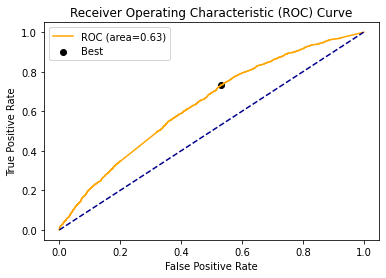

In [113]:
prob_test1 = mymodel1.predict_proba(x_test)
auc1 = roc_auc_score(y_test,prob_test1[:,1])
fpr1,tpr1,thresholds1 = roc_curve(y_test,prob_test1[:,1],pos_label=1)
J1 = tpr1 - fpr1
Ji1 = argmax(J1)
print('Best=',thresholds1[Ji1],', TPR=',tpr1[Ji1],', FPR=',fpr1[Ji1])
plot_roc_curve(fpr1,tpr1,auc1,Ji1)

In [120]:
pred_testj1 = mymodel1.predict_proba(x_test)[:,1]>thresholds1[Ji1]
print(confusion_matrix(y_test,pred_testj1))
print(classification_report(y_test,pred_testj1))

[[1750 1983]
 [ 502 1378]]
              precision    recall  f1-score   support

           0       0.78      0.47      0.58      3733
           1       0.41      0.73      0.53      1880

    accuracy                           0.56      5613
   macro avg       0.59      0.60      0.56      5613
weighted avg       0.65      0.56      0.57      5613



Best= 0.2684759698200721 , Precision= 0.40632349098510584 , Recall= 0.8082120582120582


Text(0.5, 1.0, 'Precision Recall Curve')

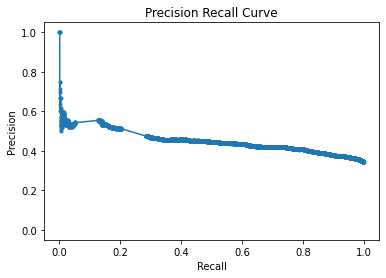

In [225]:
prec1,recl1,thresh1 = precision_recall_curve(y_test,prob_test1[:,1],pos_label=1)
aucpr1 = auc(recl1,prec1)
#K1 = (1-prec1)*(1-prec1) + (1-recl1)*(1-recl1)
K1 = (2*prec1*recl1)/(prec1+recl1+0.0000001)
Ki1 = argmax(K1)
print('Best=',thresh1[Ki1],', Precision=',prec1[Ki1],', Recall=',recl1[Ki1])
plt.plot(recl1, prec1, marker='.', label='PrecisionRecall')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall Curve")

In [215]:
mymodel2 = MLPClassifier(activation='relu',solver='sgd',alpha=1e-5,hidden_layer_sizes=(10,4),learning_rate_init=0.01,max_iter=300,verbose=10,random_state=1)

In [216]:
mymodel2.fit(x_train,y_train.ravel())
predict_train2 = mymodel2.predict(x_train)
predict_test2 = mymodel2.predict(x_test)

Iteration 1, loss = 0.65146935
Iteration 2, loss = 0.63750288
Iteration 3, loss = 0.63407067
Iteration 4, loss = 0.63124876
Iteration 5, loss = 0.62908659
Iteration 6, loss = 0.62737572
Iteration 7, loss = 0.62570045
Iteration 8, loss = 0.62472930
Iteration 9, loss = 0.62333114
Iteration 10, loss = 0.62221509
Iteration 11, loss = 0.62124932
Iteration 12, loss = 0.62050615
Iteration 13, loss = 0.61978378
Iteration 14, loss = 0.61920979
Iteration 15, loss = 0.61873257
Iteration 16, loss = 0.61815779
Iteration 17, loss = 0.61789465
Iteration 18, loss = 0.61748473
Iteration 19, loss = 0.61708469
Iteration 20, loss = 0.61679252
Iteration 21, loss = 0.61631127
Iteration 22, loss = 0.61616279
Iteration 23, loss = 0.61598712
Iteration 24, loss = 0.61570474
Iteration 25, loss = 0.61562162
Iteration 26, loss = 0.61514712
Iteration 27, loss = 0.61487200
Iteration 28, loss = 0.61476036
Iteration 29, loss = 0.61452538
Iteration 30, loss = 0.61431788
Iteration 31, loss = 0.61413181
Iteration 32, los

In [268]:
print(confusion_matrix(y_train,predict_train2))
print(classification_report(y_train,predict_train2))

[[13023  1640]
 [ 5712  2062]]
              precision    recall  f1-score   support

           0       0.70      0.89      0.78     14663
           1       0.56      0.27      0.36      7774

    accuracy                           0.67     22437
   macro avg       0.63      0.58      0.57     22437
weighted avg       0.65      0.67      0.63     22437



In [218]:
print(confusion_matrix(y_test,predict_test2))
print(classification_report(y_test,predict_test2))

[[3264  422]
 [1492  432]]
              precision    recall  f1-score   support

           0       0.69      0.89      0.77      3686
           1       0.51      0.22      0.31      1924

    accuracy                           0.66      5610
   macro avg       0.60      0.56      0.54      5610
weighted avg       0.62      0.66      0.61      5610



In [219]:
print(mymodel2.score(x_train,y_train))
print(mymodel2.score(x_test,y_test))

0.6750011142309578
0.6588235294117647


Best= 0.330507683203497 , TPR= 0.6881496881496881 , FPR= 0.4853499728703201


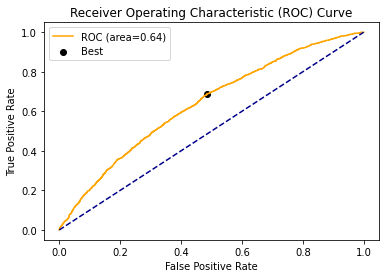

In [226]:
prob_test2 = mymodel2.predict_proba(x_test)
auc2 = roc_auc_score(y_test,prob_test2[:,1])
fpr2,tpr2,thresholds2 = roc_curve(y_test,prob_test2[:,1],pos_label=1)
J2 = tpr2 - fpr2
Ji2 = argmax(J2)
print('Best=',thresholds2[Ji2],', TPR=',tpr2[Ji2],', FPR=',fpr2[Ji2])
plot_roc_curve(fpr2,tpr2,auc2,Ji2)

In [220]:
pred_testj2 = mymodel2.predict_proba(x_test)[:,1]>thresholds2[Ji2]
print(confusion_matrix(y_test,pred_testj2))
print(classification_report(y_test,pred_testj2))

[[1897 1789]
 [ 601 1323]]
              precision    recall  f1-score   support

           0       0.76      0.51      0.61      3686
           1       0.43      0.69      0.53      1924

    accuracy                           0.57      5610
   macro avg       0.59      0.60      0.57      5610
weighted avg       0.64      0.57      0.58      5610



Best= 0.2143061271654061 , Precision= 0.37797810688989053 , Recall= 0.9152806652806653


Text(0.5, 1.0, 'Precision Recall Curve')

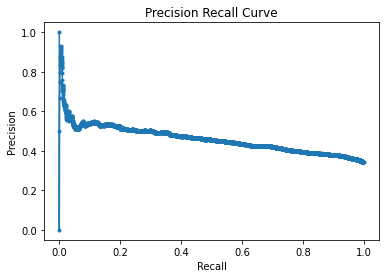

In [223]:
prec2,recl2,thresh2 = precision_recall_curve(y_test,prob_test2[:,1],pos_label=1)
aucpr2 = auc(recl2,prec2)
#K2 = (1-prec2)*(1-prec2) + (1-recl2)*(1-recl2)
K2 = (2*prec2*recl2)/(prec2+recl2+0.0000001)
Ki2 = argmax(K2)
print('Best=',thresh2[Ki2],', Precision=',prec2[Ki2],', Recall=',recl2[Ki2])
plt.plot(recl2, prec2, marker='.', label='PrecisionRecall')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall Curve")

In [258]:
mymodel3 = MLPClassifier(activation='relu',solver='sgd',alpha=1e-3,hidden_layer_sizes=(10,4),learning_rate_init=0.1,max_iter=200,verbose=10,random_state=1)

In [259]:
mymodel3.fit(x_train,y_train.ravel())
predict_train3 = mymodel3.predict(x_train)
predict_test3 = mymodel3.predict(x_test)

Iteration 1, loss = 0.63499468
Iteration 2, loss = 0.62337924
Iteration 3, loss = 0.62001453
Iteration 4, loss = 0.61817288
Iteration 5, loss = 0.61641821
Iteration 6, loss = 0.61647234
Iteration 7, loss = 0.61524787
Iteration 8, loss = 0.61498006
Iteration 9, loss = 0.61400592
Iteration 10, loss = 0.61256756
Iteration 11, loss = 0.61177966
Iteration 12, loss = 0.61274427
Iteration 13, loss = 0.61093353
Iteration 14, loss = 0.61073851
Iteration 15, loss = 0.61121061
Iteration 16, loss = 0.60994336
Iteration 17, loss = 0.61067009
Iteration 18, loss = 0.60941431
Iteration 19, loss = 0.60827277
Iteration 20, loss = 0.60854696
Iteration 21, loss = 0.60847192
Iteration 22, loss = 0.60797302
Iteration 23, loss = 0.60813741
Iteration 24, loss = 0.60716919
Iteration 25, loss = 0.60658342
Iteration 26, loss = 0.60683453
Iteration 27, loss = 0.60673693
Iteration 28, loss = 0.60617330
Iteration 29, loss = 0.60653178
Iteration 30, loss = 0.60595124
Iteration 31, loss = 0.60651215
Iteration 32, los

In [343]:
print(confusion_matrix(y_train,predict_train3))
print(classification_report(y_train,predict_train3))

[[13569  1094]
 [ 6206  1568]]
              precision    recall  f1-score   support

           0       0.69      0.93      0.79     14663
           1       0.59      0.20      0.30      7774

    accuracy                           0.67     22437
   macro avg       0.64      0.56      0.54     22437
weighted avg       0.65      0.67      0.62     22437



In [344]:
print(confusion_matrix(y_test,predict_test3))
print(classification_report(y_test,predict_test3))

[[3357  329]
 [1566  358]]
              precision    recall  f1-score   support

           0       0.68      0.91      0.78      3686
           1       0.52      0.19      0.27      1924

    accuracy                           0.66      5610
   macro avg       0.60      0.55      0.53      5610
weighted avg       0.63      0.66      0.61      5610



In [345]:
print(mymodel3.score(x_train,y_train))
print(mymodel3.score(x_test,y_test))

0.6746445603244641
0.6622103386809269


Best= 0.37553870010168133 , TPR= 0.6803534303534303 , FPR= 0.46527400976668476


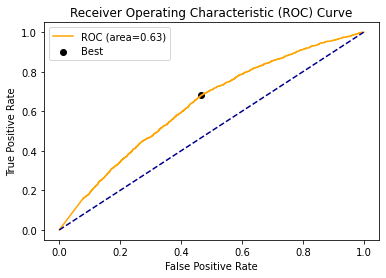

In [298]:
prob_test3 = mymodel3.predict_proba(x_test)
auc3 = roc_auc_score(y_test,prob_test3[:,1])
fpr3,tpr3,thresholds3 = roc_curve(y_test,prob_test3[:,1],pos_label=1)
J3 = tpr3 - fpr3
Ji3 = argmax(J3)
print('Best=',thresholds3[Ji3],', TPR=',tpr3[Ji3],', FPR=',fpr3[Ji3])
plot_roc_curve(fpr3,tpr3,auc3,Ji3)

In [299]:
pred_testj3 = mymodel3.predict_proba(x_test)[:,1]>thresholds3[Ji3]
print(confusion_matrix(y_test,pred_testj3))
print(classification_report(y_test,pred_testj3))

[[1971 1715]
 [ 616 1308]]
              precision    recall  f1-score   support

           0       0.76      0.53      0.63      3686
           1       0.43      0.68      0.53      1924

    accuracy                           0.58      5610
   macro avg       0.60      0.61      0.58      5610
weighted avg       0.65      0.58      0.59      5610



In [253]:
mymodel4 = MLPClassifier(activation='relu',solver='lbfgs',alpha=1e-3,hidden_layer_sizes=(10,4),max_iter=1000,verbose=10,random_state=1)

In [254]:
mymodel4.fit(x_train,y_train.ravel())
predict_train4 = mymodel4.predict(x_train)
predict_test4 = mymodel4.predict(x_test)

c:\miniconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [353]:
print(confusion_matrix(y_train,predict_train4))
print(classification_report(y_train,predict_train4))

[[13372  1291]
 [ 6023  1751]]
              precision    recall  f1-score   support

           0       0.69      0.91      0.79     14663
           1       0.58      0.23      0.32      7774

    accuracy                           0.67     22437
   macro avg       0.63      0.57      0.55     22437
weighted avg       0.65      0.67      0.63     22437



In [354]:
print(confusion_matrix(y_test,predict_test4))
print(classification_report(y_test,predict_test4))

[[3307  379]
 [1542  382]]
              precision    recall  f1-score   support

           0       0.68      0.90      0.77      3686
           1       0.50      0.20      0.28      1924

    accuracy                           0.66      5610
   macro avg       0.59      0.55      0.53      5610
weighted avg       0.62      0.66      0.61      5610



In [260]:
print(mymodel4.score(x_train,y_train))
print(mymodel4.score(x_test,y_test))

0.6741542987030351
0.6563279857397505


Best= 0.35055346585446195 , TPR= 0.6507276507276507 , FPR= 0.46011937059142705


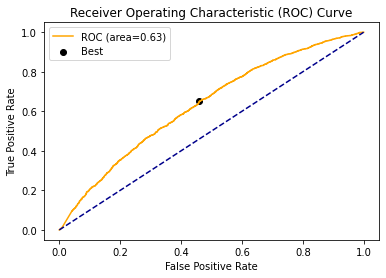

In [310]:
prob_test4 = mymodel4.predict_proba(x_test)
auc4 = roc_auc_score(y_test,prob_test4[:,1])
fpr4,tpr4,thresholds4 = roc_curve(y_test,prob_test4[:,1],pos_label=1)
J4 = tpr4 - fpr4
Ji4 = argmax(J4)
print('Best=',thresholds4[Ji4],', TPR=',tpr4[Ji4],', FPR=',fpr4[Ji4])
plot_roc_curve(fpr4,tpr4,auc4,Ji4)

In [311]:
pred_testj4 = mymodel4.predict_proba(x_test)[:,1]>thresholds4[Ji4]
print(confusion_matrix(y_test,pred_testj4))
print(classification_report(y_test,pred_testj4))

[[1990 1696]
 [ 673 1251]]
              precision    recall  f1-score   support

           0       0.75      0.54      0.63      3686
           1       0.42      0.65      0.51      1924

    accuracy                           0.58      5610
   macro avg       0.59      0.60      0.57      5610
weighted avg       0.64      0.58      0.59      5610



In [248]:
mymodel5 = MLPClassifier(activation='relu',solver='sgd',alpha=1e-4,momentum=0.9,nesterovs_momentum=True,learning_rate_init=0.01,hidden_layer_sizes=(12,4),max_iter=300,verbose=10,random_state=1)

In [249]:
mymodel5.fit(x_train,y_train.ravel())
predict_train5 = mymodel5.predict(x_train)
predict_test5 = mymodel5.predict(x_test)

Iteration 1, loss = 0.72147679
Iteration 2, loss = 0.64746709
Iteration 3, loss = 0.64326857
Iteration 4, loss = 0.64102270
Iteration 5, loss = 0.63904018
Iteration 6, loss = 0.63691809
Iteration 7, loss = 0.63488218
Iteration 8, loss = 0.63329694
Iteration 9, loss = 0.63194650
Iteration 10, loss = 0.63056108
Iteration 11, loss = 0.62912101
Iteration 12, loss = 0.62804082
Iteration 13, loss = 0.62704166
Iteration 14, loss = 0.62625575
Iteration 15, loss = 0.62538705
Iteration 16, loss = 0.62462202
Iteration 17, loss = 0.62383685
Iteration 18, loss = 0.62319012
Iteration 19, loss = 0.62265011
Iteration 20, loss = 0.62203451
Iteration 21, loss = 0.62156662
Iteration 22, loss = 0.62088824
Iteration 23, loss = 0.62047238
Iteration 24, loss = 0.61998737
Iteration 25, loss = 0.61946813
Iteration 26, loss = 0.61922915
Iteration 27, loss = 0.61877188
Iteration 28, loss = 0.61822810
Iteration 29, loss = 0.61811328
Iteration 30, loss = 0.61787046
Iteration 31, loss = 0.61748273
Iteration 32, los

In [382]:
print(confusion_matrix(y_train,predict_train5))
print(classification_report(y_train,predict_train5))

[[13528  1135]
 [ 6182  1592]]
              precision    recall  f1-score   support

           0       0.69      0.92      0.79     14663
           1       0.58      0.20      0.30      7774

    accuracy                           0.67     22437
   macro avg       0.64      0.56      0.55     22437
weighted avg       0.65      0.67      0.62     22437



In [383]:
print(confusion_matrix(y_test,predict_test5))
print(classification_report(y_test,predict_test5))

[[3359  327]
 [1553  371]]
              precision    recall  f1-score   support

           0       0.68      0.91      0.78      3686
           1       0.53      0.19      0.28      1924

    accuracy                           0.66      5610
   macro avg       0.61      0.55      0.53      5610
weighted avg       0.63      0.66      0.61      5610



In [250]:
print(mymodel5.score(x_train,y_train))
print(mymodel5.score(x_test,y_test))

0.6756250835673219
0.6655971479500892


Best= 0.3572686694083623 , TPR= 0.5738045738045738 , FPR= 0.37384698860553445


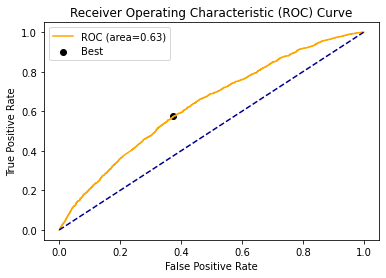

In [308]:
prob_test5 = mymodel5.predict_proba(x_test)
auc5 = roc_auc_score(y_test,prob_test5[:,1])
fpr5,tpr5,thresholds5 = roc_curve(y_test,prob_test5[:,1],pos_label=1)
J5 = tpr5 - fpr5
Ji5 = argmax(J5)
print('Best=',thresholds5[Ji5],', TPR=',tpr5[Ji5],', FPR=',fpr5[Ji5])
plot_roc_curve(fpr5,tpr5,auc5,Ji5)

In [309]:
pred_testj5 = mymodel5.predict_proba(x_test)[:,1]>thresholds5[Ji5]
print(confusion_matrix(y_test,pred_testj5))
print(classification_report(y_test,pred_testj5))

[[2308 1378]
 [ 821 1103]]
              precision    recall  f1-score   support

           0       0.74      0.63      0.68      3686
           1       0.44      0.57      0.50      1924

    accuracy                           0.61      5610
   macro avg       0.59      0.60      0.59      5610
weighted avg       0.64      0.61      0.62      5610



In [385]:
# Using SVM Algorithm

In [ ]:
# Training on modified input with 50:50 OD and nonOD rows. Testing on actual input with ~35% OD rows.

In [167]:
ODneg = ODrawnn[ODrawnn['ODFlag']==0].reset_index(drop=True)
ODpos = ODrawnn[ODrawnn['ODFlag']==1].reset_index(drop=True)
negidx = random.sample(range(len(ODneg)),len(ODpos))
ODrawneg = ODneg.loc[[0]]
for i in negidx:
    ODrawneg = pd.concat([ODrawneg,ODneg.loc[[i]]],ignore_index=True)

ODraweq = pd.concat([ODrawneg,ODpos],ignore_index=True)

In [168]:
xeq = ODraweq[predictors].values
yeq = ODraweq[target].values
xeq_train,xeq_test,yeq_train,yeq_test = train_test_split(xeq,yeq,test_size=0.289,random_state=1)

In [169]:
mymodel6 = svm.SVC(kernel="rbf",gamma=0.2,C=2.0)

In [175]:
mymodel6.fit(xeq_train,yeq_train.ravel())
predict_train6 = mymodel6.predict(xeq_train)
predict_test6 = mymodel6.predict(x_test)

In [171]:
print(confusion_matrix(yeq_train,predict_train6))
print(classification_report(yeq_train,predict_train6))

[[4600 2269]
 [1779 5143]]
              precision    recall  f1-score   support

           0       0.72      0.67      0.69      6869
           1       0.69      0.74      0.72      6922

    accuracy                           0.71     13791
   macro avg       0.71      0.71      0.71     13791
weighted avg       0.71      0.71      0.71     13791



In [176]:
print(confusion_matrix(y_test,predict_test6))
print(classification_report(y_test,predict_test6))

[[2243 1443]
 [ 554 1370]]
              precision    recall  f1-score   support

           0       0.80      0.61      0.69      3686
           1       0.49      0.71      0.58      1924

    accuracy                           0.64      5610
   macro avg       0.64      0.66      0.64      5610
weighted avg       0.69      0.64      0.65      5610



In [177]:
print(mymodel6.score(xeq_train,yeq_train))
print(mymodel6.score(x_test,y_test))

0.7064752374737148
0.6440285204991087


In [178]:
mymodel7 = svm.SVC(kernel="rbf",gamma=0.2,C=4.0)

In [179]:
mymodel7.fit(xeq_train,yeq_train.ravel())
predict_train7 = mymodel7.predict(xeq_train)
predict_test7 = mymodel7.predict(x_test)

In [180]:
print(confusion_matrix(yeq_train,predict_train7))
print(classification_report(yeq_train,predict_train7))

[[4744 2125]
 [1566 5356]]
              precision    recall  f1-score   support

           0       0.75      0.69      0.72      6869
           1       0.72      0.77      0.74      6922

    accuracy                           0.73     13791
   macro avg       0.73      0.73      0.73     13791
weighted avg       0.73      0.73      0.73     13791



In [181]:
print(confusion_matrix(y_test,predict_test7))
print(classification_report(y_test,predict_test7))

[[2245 1441]
 [ 521 1403]]
              precision    recall  f1-score   support

           0       0.81      0.61      0.70      3686
           1       0.49      0.73      0.59      1924

    accuracy                           0.65      5610
   macro avg       0.65      0.67      0.64      5610
weighted avg       0.70      0.65      0.66      5610



In [182]:
print(mymodel7.score(xeq_train,yeq_train))
print(mymodel7.score(x_test,y_test))

0.7323616851569864
0.6502673796791444


In [183]:
mymodel8 = svm.SVC(kernel="rbf",gamma=0.3,C=4.0)

In [184]:
mymodel8.fit(xeq_train,yeq_train.ravel())
predict_train8 = mymodel8.predict(xeq_train)
predict_test8 = mymodel8.predict(x_test)

In [185]:
print(confusion_matrix(yeq_train,predict_train8))
print(classification_report(yeq_train,predict_train8))

[[5001 1868]
 [1294 5628]]
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      6869
           1       0.75      0.81      0.78      6922

    accuracy                           0.77     13791
   macro avg       0.77      0.77      0.77     13791
weighted avg       0.77      0.77      0.77     13791



In [186]:
print(confusion_matrix(y_test,predict_test8))
print(classification_report(y_test,predict_test8))

[[2287 1399]
 [ 460 1464]]
              precision    recall  f1-score   support

           0       0.83      0.62      0.71      3686
           1       0.51      0.76      0.61      1924

    accuracy                           0.67      5610
   macro avg       0.67      0.69      0.66      5610
weighted avg       0.72      0.67      0.68      5610



In [187]:
print(mymodel8.score(xeq_train,yeq_train))
print(mymodel8.score(x_test,y_test))

0.7707200348053078
0.6686274509803921


In [190]:
# Using GBM Algorithm

In [185]:
mymodel9 = GradientBoostingClassifier(loss='deviance',learning_rate=0.1,n_estimators=300,subsample=1.0,
                                     min_samples_split=100,min_samples_leaf=50,max_depth=3,random_state=1,
                                     verbose=1)

In [186]:
mymodel9.fit(x_train,y_train.ravel())
predict_train9 = mymodel9.predict(x_train)
predict_test9 = mymodel9.predict(x_test)

      Iter       Train Loss   Remaining Time 
         1           1.2852            1.64m
         2           1.2808            1.55m
         3           1.2768            1.55m
         4           1.2735            1.52m
         5           1.2706            1.52m
         6           1.2679            1.51m
         7           1.2656            1.50m
         8           1.2630            1.49m
         9           1.2611            1.49m
        10           1.2589            1.48m
        20           1.2448            1.43m
        30           1.2359            1.37m
        40           1.2293            1.32m
        50           1.2240            1.30m
        60           1.2201            1.26m
        70           1.2162            1.20m
        80           1.2125            1.15m
        90           1.2098            1.09m
       100           1.2066            1.04m
       200           1.1786           30.77s
       300           1.1582            0.00s


In [187]:
print(confusion_matrix(y_train,predict_train9))
print(classification_report(y_train,predict_train9))

[[13915   748]
 [ 6229  1545]]
              precision    recall  f1-score   support

           0       0.69      0.95      0.80     14663
           1       0.67      0.20      0.31      7774

    accuracy                           0.69     22437
   macro avg       0.68      0.57      0.55     22437
weighted avg       0.68      0.69      0.63     22437



In [188]:
print(confusion_matrix(y_test,predict_test9))
print(classification_report(y_test,predict_test9))

[[3430  256]
 [1635  289]]
              precision    recall  f1-score   support

           0       0.68      0.93      0.78      3686
           1       0.53      0.15      0.23      1924

    accuracy                           0.66      5610
   macro avg       0.60      0.54      0.51      5610
weighted avg       0.63      0.66      0.60      5610



In [189]:
print(mymodel9.score(x_train,y_train))
print(mymodel9.score(x_test,y_test))

0.6890404242991487
0.6629233511586453


Best= 0.3276757889877738 , TPR= 0.7042619542619543 , FPR= 0.49294628323385786


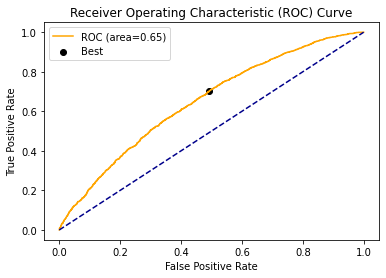

In [302]:
prob_test9 = mymodel9.predict_proba(x_test)
auc9 = roc_auc_score(y_test,prob_test9[:,1])
fpr9,tpr9,thresholds9 = roc_curve(y_test,prob_test9[:,1],pos_label=1)
J9 = tpr9 - fpr9
Ji9 = argmax(J9)
print('Best=',thresholds9[Ji9],', TPR=',tpr9[Ji9],', FPR=',fpr9[Ji9])
plot_roc_curve(fpr9,tpr9,auc9,Ji9)

In [303]:
pred_testj9 = mymodel9.predict_proba(x_test)[:,1]>thresholds9[Ji9]
print(confusion_matrix(y_test,pred_testj9))
print(classification_report(y_test,pred_testj9))

[[1869 1817]
 [ 570 1354]]
              precision    recall  f1-score   support

           0       0.77      0.51      0.61      3686
           1       0.43      0.70      0.53      1924

    accuracy                           0.57      5610
   macro avg       0.60      0.61      0.57      5610
weighted avg       0.65      0.57      0.58      5610



In [199]:
mymodel10 = GradientBoostingClassifier(loss='deviance',learning_rate=0.1,n_estimators=300,subsample=1.0,
                                     min_samples_split=100,min_samples_leaf=50,max_depth=10,random_state=1,
                                     verbose=1)

In [243]:
mymodel10.fit(x_train,y_train.ravel())
predict_train10 = mymodel10.predict(x_train)
predict_test10 = mymodel10.predict(x_test)

      Iter       Train Loss   Remaining Time 
         1           1.2712            1.32m
         2           1.2554            1.28m
         3           1.2421            1.26m
         4           1.2293            1.25m
         5           1.2183            1.24m
         6           1.2081            1.24m
         7           1.2001            1.23m
         8           1.1921            1.23m
         9           1.1842            1.23m
        10           1.1769            1.22m
        20           1.1253            1.20m
        30           1.0911            1.18m
        40           1.0709            1.16m
        50           1.0532            1.13m
        60           1.0344            1.09m
        70           1.0130            1.05m
        80           0.9908            1.01m
        90           0.9792           58.02s
       100           0.9699           55.58s
       200           0.8720           28.32s
       300           0.7803            0.00s


In [195]:
print(confusion_matrix(y_train,predict_train10))
print(classification_report(y_train,predict_train10))

[[14286   377]
 [ 2612  5162]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91     14663
           1       0.93      0.66      0.78      7774

    accuracy                           0.87     22437
   macro avg       0.89      0.82      0.84     22437
weighted avg       0.88      0.87      0.86     22437



In [196]:
print(confusion_matrix(y_test,predict_test10))
print(classification_report(y_test,predict_test10))

[[3170  516]
 [1425  499]]
              precision    recall  f1-score   support

           0       0.69      0.86      0.77      3686
           1       0.49      0.26      0.34      1924

    accuracy                           0.65      5610
   macro avg       0.59      0.56      0.55      5610
weighted avg       0.62      0.65      0.62      5610



In [197]:
print(mymodel10.score(x_train,y_train))
print(mymodel10.score(x_test,y_test))

0.8667825466862771
0.6540106951871658


Best= 0.2963709564224234 , TPR= 0.7001039501039501 , FPR= 0.4945740640260445


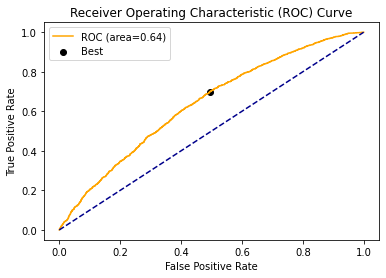

In [306]:
prob_test10 = mymodel10.predict_proba(x_test)
auc10 = roc_auc_score(y_test,prob_test10[:,1])
fpr10,tpr10,thresholds10 = roc_curve(y_test,prob_test10[:,1],pos_label=1)
J10 = tpr10 - fpr10
Ji10 = argmax(J10)
print('Best=',thresholds10[Ji10],', TPR=',tpr10[Ji10],', FPR=',fpr10[Ji10])
plot_roc_curve(fpr10,tpr10,auc10,Ji10)

In [307]:
pred_testj10 = mymodel10.predict_proba(x_test)[:,1]>thresholds10[Ji10]
print(confusion_matrix(y_test,pred_testj10))
print(classification_report(y_test,pred_testj10))

[[1863 1823]
 [ 578 1346]]
              precision    recall  f1-score   support

           0       0.76      0.51      0.61      3686
           1       0.42      0.70      0.53      1924

    accuracy                           0.57      5610
   macro avg       0.59      0.60      0.57      5610
weighted avg       0.65      0.57      0.58      5610



In [206]:
mymodel11 = GradientBoostingClassifier(loss='deviance',learning_rate=0.1,n_estimators=500,subsample=1.0,
                                     min_samples_split=100,min_samples_leaf=50,max_depth=20,random_state=1,
                                     verbose=1)

In [207]:
mymodel11.fit(x_train,y_train.ravel())
predict_train11 = mymodel11.predict(x_train)
predict_test11 = mymodel11.predict(x_test)

      Iter       Train Loss   Remaining Time 
         1           1.2646            8.93m
         2           1.2419            9.09m
         3           1.2218            9.06m
         4           1.2028            9.19m
         5           1.1856            9.02m
         6           1.1697            9.18m
         7           1.1534            9.17m
         8           1.1379            9.23m
         9           1.1256            9.39m
        10           1.1138            9.52m
        20           1.0239           10.42m
        30           0.9580           10.75m
        40           0.9096           10.91m
        50           0.8868           11.16m
        60           0.8592           11.19m
        70           0.8291           11.09m
        80           0.8093           10.98m
        90           0.7970           10.91m
       100           0.7760           10.73m
       200           0.6200            8.35m
       300           0.4989            5.64m
       40

In [208]:
print(confusion_matrix(y_train,predict_train11))
print(classification_report(y_train,predict_train11))

[[14642    21]
 [   95  7679]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     14663
           1       1.00      0.99      0.99      7774

    accuracy                           0.99     22437
   macro avg       1.00      0.99      0.99     22437
weighted avg       0.99      0.99      0.99     22437



In [209]:
print(confusion_matrix(y_test,predict_test11))
print(classification_report(y_test,predict_test11))

[[2973  713]
 [1300  624]]
              precision    recall  f1-score   support

           0       0.70      0.81      0.75      3686
           1       0.47      0.32      0.38      1924

    accuracy                           0.64      5610
   macro avg       0.58      0.57      0.56      5610
weighted avg       0.62      0.64      0.62      5610



In [210]:
print(mymodel11.score(x_train,y_train))
print(mymodel11.score(x_test,y_test))

0.9948299683558408
0.6411764705882353


Best= 0.2406304451631563 , TPR= 0.6616424116424117 , FPR= 0.4723277265328269


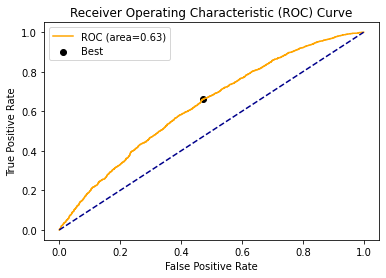

In [304]:
prob_test11 = mymodel11.predict_proba(x_test)
auc11 = roc_auc_score(y_test,prob_test11[:,1])
fpr11,tpr11,thresholds11 = roc_curve(y_test,prob_test11[:,1],pos_label=1)
J11 = tpr11 - fpr11
Ji11 = argmax(J11)
print('Best=',thresholds11[Ji11],', TPR=',tpr11[Ji11],', FPR=',fpr11[Ji11])
plot_roc_curve(fpr11,tpr11,auc11,Ji11)

In [305]:
pred_testj11 = mymodel11.predict_proba(x_test)[:,1]>thresholds11[Ji11]
print(confusion_matrix(y_test,pred_testj11))
print(classification_report(y_test,pred_testj11))

[[1945 1741]
 [ 652 1272]]
              precision    recall  f1-score   support

           0       0.75      0.53      0.62      3686
           1       0.42      0.66      0.52      1924

    accuracy                           0.57      5610
   macro avg       0.59      0.59      0.57      5610
weighted avg       0.64      0.57      0.58      5610



In [211]:
mymodel12 = GradientBoostingClassifier(loss='deviance',learning_rate=0.1,n_estimators=500,subsample=0.9,
                                     min_samples_split=100,min_samples_leaf=50,max_depth=20,random_state=1,
                                     verbose=1)

In [212]:
mymodel12.fit(x_train,y_train.ravel())
predict_train12 = mymodel12.predict(x_train)
predict_test12 = mymodel12.predict(x_test)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.2638           0.0130            8.84m
         2           1.2443           0.0055            8.49m
         3           1.2239           0.0062            8.33m
         4           1.2064           0.0042            8.23m
         5           1.1896           0.0036            8.16m
         6           1.1753           0.0044            8.24m
         7           1.1577           0.0035            8.34m
         8           1.1453           0.0004            8.45m
         9           1.1342           0.0016            8.50m
        10           1.1235           0.0008            8.48m
        20           1.0315          -0.0002            9.14m
        30           0.9724          -0.0012            9.65m
        40           0.9305          -0.0013            9.93m
        50           0.8862          -0.0010            9.91m
        60           0.8486          -0.0015            9.83m
       

In [213]:
print(confusion_matrix(y_train,predict_train12))
print(classification_report(y_train,predict_train12))

[[14654     9]
 [   25  7749]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14663
           1       1.00      1.00      1.00      7774

    accuracy                           1.00     22437
   macro avg       1.00      1.00      1.00     22437
weighted avg       1.00      1.00      1.00     22437



In [214]:
print(confusion_matrix(y_test,predict_test12))
print(classification_report(y_test,predict_test12))

[[2961  725]
 [1295  629]]
              precision    recall  f1-score   support

           0       0.70      0.80      0.75      3686
           1       0.46      0.33      0.38      1924

    accuracy                           0.64      5610
   macro avg       0.58      0.57      0.56      5610
weighted avg       0.62      0.64      0.62      5610



In [215]:
print(mymodel12.score(x_train,y_train))
print(mymodel12.score(x_test,y_test))

0.9984846458974016
0.6399286987522281


Best= 0.22449490028456143 , TPR= 0.6351351351351351 , FPR= 0.44519804666304935


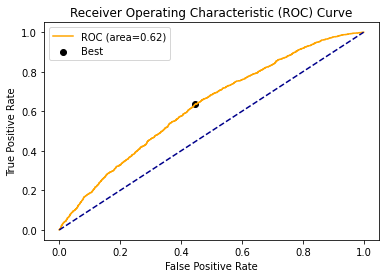

In [300]:
prob_test12 = mymodel12.predict_proba(x_test)
auc12 = roc_auc_score(y_test,prob_test12[:,1])
fpr12,tpr12,thresholds12 = roc_curve(y_test,prob_test12[:,1],pos_label=1)
J12 = tpr12 - fpr12
Ji12 = argmax(J12)
print('Best=',thresholds12[Ji12],', TPR=',tpr12[Ji12],', FPR=',fpr12[Ji12])
plot_roc_curve(fpr12,tpr12,auc12,Ji12)

In [301]:
pred_testj12 = mymodel12.predict_proba(x_test)[:,1]>thresholds12[Ji12]
print(confusion_matrix(y_test,pred_testj12))
print(classification_report(y_test,pred_testj12))

[[2045 1641]
 [ 703 1221]]
              precision    recall  f1-score   support

           0       0.74      0.55      0.64      3686
           1       0.43      0.63      0.51      1924

    accuracy                           0.58      5610
   macro avg       0.59      0.59      0.57      5610
weighted avg       0.64      0.58      0.59      5610



In [312]:
# Using RandomForest Algorithm

In [414]:
mymodel13 = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=20,min_samples_split=10,
                                   min_samples_leaf=5,bootstrap=True,max_samples=5000,random_state=1,verbose=1)

In [415]:
mymodel13.fit(x_train,y_train.ravel())
predict_train13 = mymodel13.predict(x_train)
predict_test13 = mymodel13.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [416]:
print(confusion_matrix(y_train,predict_train13))
print(classification_report(y_train,predict_train13))

[[14335   328]
 [ 6323  1451]]
              precision    recall  f1-score   support

           0       0.69      0.98      0.81     14663
           1       0.82      0.19      0.30      7774

    accuracy                           0.70     22437
   macro avg       0.75      0.58      0.56     22437
weighted avg       0.74      0.70      0.64     22437



In [417]:
print(confusion_matrix(y_test,predict_test13))
print(classification_report(y_test,predict_test13))

[[3521  165]
 [1697  227]]
              precision    recall  f1-score   support

           0       0.67      0.96      0.79      3686
           1       0.58      0.12      0.20      1924

    accuracy                           0.67      5610
   macro avg       0.63      0.54      0.49      5610
weighted avg       0.64      0.67      0.59      5610



In [418]:
print(mymodel13.score(x_train,y_train))
print(mymodel13.score(x_test,y_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.7035699959887686
0.6680926916221034


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Best= 0.3630960942762698 , TPR= 0.6081081081081081 , FPR= 0.39012479652740095


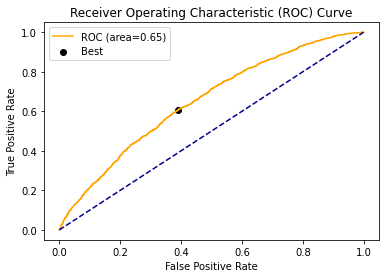

In [419]:
prob_test13 = mymodel13.predict_proba(x_test)
auc13 = roc_auc_score(y_test,prob_test13[:,1])
fpr13,tpr13,thresholds13 = roc_curve(y_test,prob_test13[:,1],pos_label=1)
J13 = tpr13 - fpr13
Ji13 = argmax(J13)
print('Best=',thresholds13[Ji13],', TPR=',tpr13[Ji13],', FPR=',fpr13[Ji13])
plot_roc_curve(fpr13,tpr13,auc13,Ji13)

In [420]:
pred_testj13 = mymodel13.predict_proba(x_test)[:,1]>thresholds13[Ji13]
print(confusion_matrix(y_test,pred_testj13))
print(classification_report(y_test,pred_testj13))

[[2248 1438]
 [ 755 1169]]
              precision    recall  f1-score   support

           0       0.75      0.61      0.67      3686
           1       0.45      0.61      0.52      1924

    accuracy                           0.61      5610
   macro avg       0.60      0.61      0.59      5610
weighted avg       0.65      0.61      0.62      5610



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [385]:
mymodel14 = RandomForestClassifier(n_estimators=100,random_state=1,verbose=1)

In [386]:
mymodel14.fit(x_train,y_train.ravel())
predict_train14 = mymodel14.predict(x_train)
predict_test14 = mymodel14.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [387]:
print(confusion_matrix(y_train,predict_train14))
print(classification_report(y_train,predict_train14))

[[14657     6]
 [    8  7766]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14663
           1       1.00      1.00      1.00      7774

    accuracy                           1.00     22437
   macro avg       1.00      1.00      1.00     22437
weighted avg       1.00      1.00      1.00     22437



In [388]:
print(confusion_matrix(y_test,predict_test14))
print(classification_report(y_test,predict_test14))

[[3223  463]
 [1448  476]]
              precision    recall  f1-score   support

           0       0.69      0.87      0.77      3686
           1       0.51      0.25      0.33      1924

    accuracy                           0.66      5610
   macro avg       0.60      0.56      0.55      5610
weighted avg       0.63      0.66      0.62      5610



In [389]:
print(mymodel14.score(x_train,y_train))
print(mymodel14.score(x_test,y_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.999376030663636
0.6593582887700534


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


Best= 0.3 , TPR= 0.751039501039501 , FPR= 0.5553445469343462


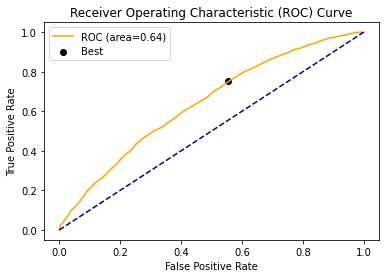

In [390]:
prob_test14 = mymodel14.predict_proba(x_test)
auc14 = roc_auc_score(y_test,prob_test14[:,1])
fpr14,tpr14,thresholds14 = roc_curve(y_test,prob_test14[:,1],pos_label=1)
J14 = tpr14 - fpr14
Ji14 = argmax(J14)
print('Best=',thresholds14[Ji14],', TPR=',tpr14[Ji14],', FPR=',fpr14[Ji14])
plot_roc_curve(fpr14,tpr14,auc14,Ji14)

In [391]:
pred_testj14 = mymodel14.predict_proba(x_test)[:,1]>thresholds14[Ji14]
print(confusion_matrix(y_test,pred_testj14))
print(classification_report(y_test,pred_testj14))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


[[1730 1956]
 [ 535 1389]]
              precision    recall  f1-score   support

           0       0.76      0.47      0.58      3686
           1       0.42      0.72      0.53      1924

    accuracy                           0.56      5610
   macro avg       0.59      0.60      0.55      5610
weighted avg       0.64      0.56      0.56      5610



In [398]:
mymodel14.estimators_[5]
#export_graphviz(tree, out_file = 'tree.dot', feature_names = predictors, rounded = True, precision = 1)
#(graph, ) = pydot.graph_from_dot_file('tree.dot')
#graph.write_png('tree.png')

DecisionTreeClassifier(max_features='auto', random_state=550290313)

In [421]:
# For selecting final model, predicting more True Positives is priority. For above model14, i.e. 1389.
# But it should also have good TP% of all +ve predictions. For above model14, i.e. 1389/(1389+1956)= 42%.

In [ ]:
# Min Precision = 45% (Given Default Precision = 30%)

In [227]:
# Precision Recall curves were giving thresholds with lower Precision than ROC curves in lue of higher recall.
# Hence, our minimum precision criteria of 45% was not being met with precision recall curve.

In [422]:
# Amongst all models, mymodel13 (RF) has TP of 1169 and TP% of +ve prediction of 45%. Its ROC auc of 0.65
# is also the best. Its test score of 0.668 is also the best. Hence, it is the best model.

In [ ]:
# Amongst all models, mymodel8 (SVM) has TP of 1464 and TP% of +ve prediction of 51%. Its ROC auc of 0.65
# is also the best. Its test score of 0.668 is also the best. Hence, it is the best model.